## Predicting Spotify Track Popularity: A Comparative Analysis of Classification Models 
### All Time Top 2000s Mega Dataset

TABLE OF CONTENT

0. INTRODUCTION & PROJECT GOAL
1. IMPORTING LIBRARIES
2. DATA DESCRIPTION & CLEANING
3. EXPLORATORY ANALYSIS & VISUALISATIONS
4. MODELLING DATA
5. FINAL CONCLUSIONS

# 0. Introduction

#### Data Collection
The dataset for this project was sourced from Kaggle:
[Spotify Top 2000s Mega Dataset](https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset)

#### Context
This dataset contains audio statistics for approximately 2,000 tracks from 1956 to 2019 on Spotify. It includes 15 columns, each describing a track and its attributes.

#### Acknowledgements
The data was extracted from the Spotify playlist "Top 2000s" on PlaylistMachinery (@plamere) using Python and Selenium. The original data was scraped from: [Sort Your Music](http://sortyourmusic.playlistmachinery.com/).

#### Content Variables
1. Index: Track ID
2. Title: Track name
3. Artist: Artist name
4. Top Genre: Genre of the track
5. Year: Release year
6. Beats per Minute (BPM): Tempo of the song
7. Energy: Measure of the song's intensity (higher = more energetic)
8. Danceability: Ease of dancing to the song (higher = easier)
9. Loudness: Volume of the song (higher = louder)
10. Valence: Positivity of the song's mood (higher = more positive)
11. Length: Duration of the song
12. Acoustic: Acoustic nature of the song (higher = more acoustic)
13. Speechiness: Spoken word content in the song (higher = more spoken words)
14. Popularity: Popularity rating of the song (higher = more popular)

# 0. PROJECT GOAL & INTERESTS:

The primary goal is to build classification models—**Linear Regression, Decision Tree Classifier, and Naive Bayes**—to predict a song's popularity based on its features.

Along the way, we will explore:

- The most popular genres and artists from the 1950s to the 2000s.
- Trends in genre preferences over time, comparing past and present.
- Other factors influencing the popularity metric.

# 1 IMPORTING LIBRARIES

In [1058]:
import kagglehub

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

from sklearn import model_selection, linear_model, tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# 2 DATA DESCRIPTION & CLEANING

#### 2.1 DATA DESCRIPTION

In [1059]:
# Download latest version of Spotify Top 2000s Mega Dataset
path = kagglehub.dataset_download("iamsumat/spotify-top-2000s-mega-dataset")

# Loading datadataset & View
spotify_df = pd.read_csv(f"{path}/Spotify-2000.csv")

# Display the first 5 rows of the dataset
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [1060]:
# Overview of Dataset information and data types

spotify_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [1061]:
# Overview of Dataset numerical data

spotify_df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [1062]:
# Number of genres that have featured in the all time top 2000.

len(spotify_df["Top Genre"].unique())

149

In [1063]:
# Number of times each genre features in the all time top 2000.

spotify_df["Top Genre"].value_counts()

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: count, Length: 149, dtype: int64

### Raw Dataset  Summary:

#### The Dataset contains:
- 1994 entries
- 1994 non-null entries
- 15 total variable columns
- 149 Genre entries

#### Data Types:
- 4 categorical columns
- 11 numerical columns

#### Numerical Data:
- The data set is between years 1994 - 2019. Just about 63 years worth of most popular songs as classified by spotify.
- min Popularity of a song is 11 and max is 100.


### Initial Analysis & Progression:

1. It's clear that Rock music seems to be the all time favourite genre with the most features. But that being said the data is lob-sidded towards pre-2000s and music taste does tend to change over the years so this can be be investigated further in the EDA.

### 2.2 Data Cleaning

#### Action:

1. Convert column data types.
2. Remove unecessary columns. 
3. Adjust column titles.
4. consolidate genre column as there are many variations of a single genre e.g. 'dutch pop' and 'dance pop' or 'album rock'and alternative rock. we will make these columns just 'pop' or just 'rock' as to provide a more accurate summarised representation of that genres.

In [1064]:
#Converting Length (Duration) to an integer data type

print(f"Length (Duration) data type before: {spotify_df['Length (Duration)'].dtype}")

spotify_df.replace(',','', regex=True, inplace=True)
spotify_df['Length (Duration)']= spotify_df['Length (Duration)'].apply(pd.to_numeric,errors='coerce')

print(f"Length (Duration) data type after: {spotify_df['Length (Duration)'].dtype}")

Length (Duration) data type before: object
Length (Duration) data type after: int64


In [1065]:
#Removing the Index column.
spotify_df.drop(columns = ['Index'], inplace = True)

#Converting all column titles to lowercase.
spotify_df.columns = map(str.lower, spotify_df.columns)

#Coverting column names to have no space between, if they do, replace space with an underscore "_"
spotify_df.rename(columns = {'top genre' : 'genre', 'beats per minute (bpm)':'beats_per_minute','loudness (db)': 'loudness','length (duration)': 'duration'}, inplace = True)

In [1066]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1994 non-null   object
 1   artist            1994 non-null   object
 2   genre             1994 non-null   object
 3   year              1994 non-null   int64 
 4   beats_per_minute  1994 non-null   int64 
 5   energy            1994 non-null   int64 
 6   danceability      1994 non-null   int64 
 7   loudness          1994 non-null   int64 
 8   liveness          1994 non-null   int64 
 9   valence           1994 non-null   int64 
 10  duration          1994 non-null   int64 
 11  acousticness      1994 non-null   int64 
 12  speechiness       1994 non-null   int64 
 13  popularity        1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 218.2+ KB


In [1067]:
spotify_df.head(3)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


### Consolidating genre column

In [1068]:
# List of keywords to map genres to consolidated (general) genres
genre_keywords = {
    'hip hop': 'hip hop',
    'rock': 'rock',
    'pop': 'pop',
    'metal': 'metal',
    'country': 'country',
    "indie": "indie",
    "jazz": "jazz",
    "alternative": "alternative",
    "singer-songwriter": "singer-songwriter",
}

# Function to generalize genres based on keywords
def generalize_genre(genre):
    for keyword, consolidated_genre in genre_keywords.items():
        if keyword in genre.lower():  # Case-insensitive match
            return consolidated_genre
    return genre  # Return original if no match found


# Create a copy of the genre column and apply the transformation
new_genre = spotify_df['genre'].copy().apply(generalize_genre)

print(
    f"New Total of Genres from {len(spotify_df['genre'].unique())} to --> {len(new_genre.unique())}")

New Total of Genres from 149 to --> 67


In [1069]:
new_genre.value_counts()

genre
rock                857
pop                 388
adult standards     123
metal                93
indie                79
                   ... 
stomp and holler      1
electronica           1
happy hardcore        1
trance                1
bebop                 1
Name: count, Length: 67, dtype: int64

### Analysis:
- Above shows consolidated genre column into single/more generalistic genres into rock, pop etc.
- There is also an expected increase in values due to the consolidating the genres.

In [1070]:
#inputting new column values from new_genre to genre in dataframe.

spotify_df['genre'] = new_genre
spotify_df['genre']

0       adult standards
1                  rock
2               hip hop
3                 metal
4                  rock
             ...       
1989    adult standards
1990    adult standards
1991               rock
1992              bebop
1993    adult standards
Name: genre, Length: 1994, dtype: object

# 3 EXPLORATORY ANALYSIS & VISUALISATIONS


-  In this section we will investigate the data. Taking a particular look at our target features: "Popularity" & "Genre" and their correlating variables within the data set.

### 3.1 Most popular Genres & Artists from 1950s to 2000s?

In [1071]:
# Create a function top_10, which takes a single parameter for a column. 
# Group the data by the desired column input, sum the values the remaining columns, sort sum values by 'Popularity' column 
# from highest to lowest, the print the top 10 rows. 

def top_10(column):
    top_10_songs = spotify_df.groupby([column]).sum().sort_values('popularity', ascending=False).head(10)
    return(top_10_songs[['popularity']])  # Only show 'popularity' column.

top_10('genre')

,popularity
genre,
rock,52058
pop,22578
adult standards,7697
metal,6141
indie,3054
permanent wave,2571
british invasion,2451
dutch cabaret,2349
british soul,2058


In [1072]:
#Use the same function for the Artists

top_10('artist')

,popularity
artist,
The Beatles,2451
Queen,2085
Coldplay,1888
Michael Jackson,1511
The Rolling Stones,1496
U2,1476
Bruce Springsteen,1378
David Bowie,1311
ABBA,1186


#### 3.1 Conclusion:

- The data highlights the accumulation of the most popular genres and artists over time. Notably, the Rock genre has a significant number of entries, making it unsurprising that Rock emerges as the most dominant genre overall. However, Michael Jackson stands out as an outlier, reflecting his exceptional popularity across eras.

- When looking at 'pure' popularity (scored from 0 to 100), a different trend emerges. Pop music and its variations dominate in recent years, suggesting a shift in musical preferences. This shift may be attributed to changes in listening habits influenced by advancements in technology, such as streaming platforms and global accessibility.

In [1073]:
pure_popularity = spotify_df.sort_values('popularity', ascending=False).head(10)
pure_popularity[['genre', 'year', 'popularity']]

,genre,year,popularity
793,pop,2019,100
787,pop,2019,98
786,pop,2019,95
1641,pop,1994,95
688,rock,2017,88
726,pop,2018,88
683,pop,2017,87
687,pop,2017,87
745,pop,2018,87
529,neo mellow,2013,86


## 3.2  Is there a trend/shift in genres prefered to pre-2000s vs now over the years?

To approach this, I will **split the dataset into quarters (n/4) and track the popularity change** in genre, as well as the genre entry count over the years. 

In [1074]:
# Split of 'Year' column data into 4x equal-dispersed buckets in ascending order from 1956 - 2019:

spotify_df['year'] = pd.qcut(spotify_df['year'], q=4, labels=[1, 2, 3, 4]) 
spotify_df['year'].value_counts()

year
1    520
3    500
4    496
2    478
Name: count, dtype: int64

[Text(0.5, 0, 'Year Block (YB) divided into 4/4'), Text(0, 0.5, 'Year Count')]

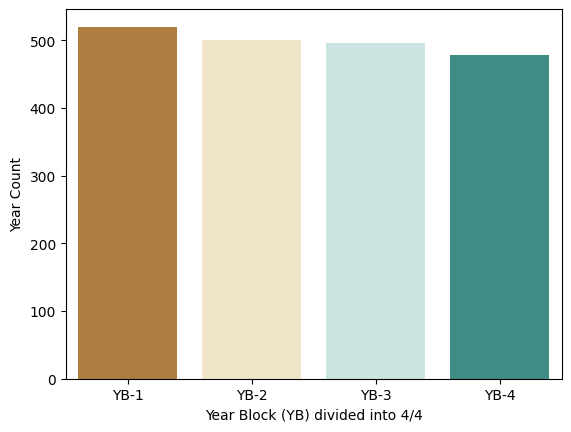

In [1075]:
x=['YB-1', 'YB-2', 'YB-3', 'YB-4']
y=spotify_df['year'].value_counts()

_ = sns.barplot(x=x, y=y, palette="BrBG", hue=x, legend=False)
_.set(xlabel='Year Block (YB) divided into 4/4', ylabel='Year Count')

In [1076]:
# Function for creating year block sets (1 - 4):

def year_block(year_no):
    block = spotify_df.loc[spotify_df['year'] == year_no]
    return block[['genre', 'year', 'popularity']].sort_values('popularity', ascending=False)

# Function for creating Top 5 genre value counts for Pie Chart visual:

def genre_count(year_block):
    return year_block['genre'].value_counts().head()

## Pie Chart Visuals of Year Blocks showing trend/shift in genres between (1956 - 2019)

In [1077]:
# # Creation of Year block 1 & Genre counter for Pie Chart Visual:
# year_block_1 = year_block(1) 
# genre_count(year_block_1)
   
# # Pie chart for year block 1:
# values = genre_count(year_block_1).values
# names = genre_count(year_block_1).index
# colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

# fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
# fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
#                   marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
# fig.update_layout(title_text='Year Block 1')
# fig.show()
   
    
# # Creation of Year block 2 & Genre counter for Pie Chart Visual:
# year_block_2 = year_block(2) 
# genre_count(year_block_2)
   
# # Pie chart for year block 2:
# values = genre_count(year_block_2).values
# names = genre_count(year_block_2).index
# colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

# fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
# fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
#                   marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
# fig.update_layout(title_text='Year Block 2')
# fig.show()


# # Creation of Year block 3 & Genre counter for Pie Chart Visual:
# year_block_3 = year_block(3) 
# genre_count(year_block_3)
   
# # Pie chart for year block 3:
# values = genre_count(year_block_3).values
# names = genre_count(year_block_3).index
# colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

# fig = go.Figure(data=[go.Pie(labels=names, values=values, name="Year Block 3", pull=[0.1, 0, 0, 0, 0])])
# fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
#                   marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
# fig.update_layout(title_text='Year Block 3')
# fig.show()


# #Creation of Year block 4 & Genre counter for Pie Chart Viaual:
# year_block_4 = year_block(4) 
# genre_count(year_block_4)
   
# #Pie chart for year block 4:
# values = genre_count(year_block_4).values
# names = genre_count(year_block_4).index
# colors = ['mediumturquoise','gold', 'darkorange', 'lightgreen', 'AntiqueWhite']

# fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
# fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
#                   marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
# fig.update_layout(title_text='Year Block 4')
# fig.show() 


def create_pie_chart(year_block_num, title):
    """
    Function to create and display a pie chart for a given year block.
    
    Parameters:
    year_block_num (int): The year block number.
    title (str): The title for the pie chart.
    """
    # Create the year block
    year_block_data = year_block(year_block_num)

    # Get genre count for the year block
    genre_counts = genre_count(year_block_data)

    # Extract values and names for the pie chart
    values = genre_counts.values
    names = genre_counts.index

    # Define colors for the pie chart
    colors = ['gold', 'mediumturquoise',
              'darkorange', 'lightgreen', 'AntiqueWhite']

    # Create the pie chart
    fig = go.Figure(
        data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
    fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                      marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
    fig.update_layout(title_text=title)

    # Display the pie chart
    fig.show()


# Create and display pie charts for each year block
create_pie_chart(1, 'Year Block 1')
create_pie_chart(2, 'Year Block 2')
create_pie_chart(3, 'Year Block 3')
create_pie_chart(4, 'Year Block 4')

#### 3.2 Conclusion: Pie Chart Analysis:
- The analysis reveals a clear shift in genre preference over time, with Rock dominating earlier periods and transitioning to Pop music in the later years (Q4/4). However, as we’ll observe below, the popularity of Pop music at its peak far surpasses that of Rock during its most dominant era.

## Genre Popularity Count over the years

In [1078]:
# # Create year blocks:
year_block_1 = year_block(1)
year_block_2 = year_block(2)
year_block_3 = year_block(3)
year_block_4 = year_block(4)

# Joining the year_block heads for top genre count:
frames = [year_block_1.head(), year_block_2.head(), year_block_3.head(), year_block_4.head()]
top_genre_df = pd.concat(frames)
top_genre_df

,genre,year,popularity
1113,rock,1,83
943,rock,1,82
999,rock,1,82
884,rock,1,82
1947,british invasion,1,82
1237,rock,2,84
1204,rock,2,84
1157,rock,2,83
1452,celtic punk,2,83
1315,rock,2,83


## 3.3 What other features have an impact on the popularity of a song?

To determine the factors influencing a song's popularity, we will analyze numerical audio features and identify correlations between them. This will help us define the most relevant features for building an accurate classification model.

As a first step, we will remove the 'Title' and 'Year' columns since their unique values do not contribute to the predictive power of our model.

In [1079]:
spotify_df.drop(columns = ['title','year'], inplace = True)
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Norah Jones,adult standards,157,30,53,-14,11,68,201,94,3,71
1,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
2,Gorillaz,hip hop,168,69,66,-9,7,52,341,2,17,69
3,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
4,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


#### Note:
Music genres with very few entries can negatively impact the efficiency of our model, as they lack sufficient data for meaningful analysis. To address this:
**Genres with fewer than 20 occurrences in the dataset will be removed, along with their corresponding rows in the original DataFrame.**

In [1080]:
unique = spotify_df['genre'].unique()
to_remove = [] 

# genres that have a single instance only will be placed within the to_remove array
for genre in unique:
    count = spotify_df['genre'].value_counts().get(genre, 0)
    if count < 20:
        to_remove += [genre]
    else:
        print(genre, 'has', count, 'instances')


print(f"Genre Values to be removed from data set = {len(to_remove)}")

adult standards has 123 instances
rock has 857 instances
hip hop has 29 instances
metal has 93 instances
pop has 388 instances
indie has 79 instances
dutch cabaret has 51 instances
permanent wave has 38 instances
british soul has 31 instances
british invasion has 36 instances
Genre Values to be removed from data set = 57


#### - Now to replace our original genre column with the updated version

In [1081]:
spotify_df.set_index(["genre"],drop = False, inplace = True)
for name in to_remove:
    type(name)
    spotify_df.drop(index = str(name), inplace = True)
    
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
genre,,,,,,,,,,,,
adult standards,Norah Jones,adult standards,157,30,53,-14,11,68,201,94,3,71
rock,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
hip hop,Gorillaz,hip hop,168,69,66,-9,7,52,341,2,17,69
metal,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
rock,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


In [1082]:
spotify_df = spotify_df.reset_index(drop=True)
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Norah Jones,adult standards,157,30,53,-14,11,68,201,94,3,71
1,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
2,Gorillaz,hip hop,168,69,66,-9,7,52,341,2,17,69
3,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
4,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


#### - As you can see genre's have been removed with those having an instance less than 20.

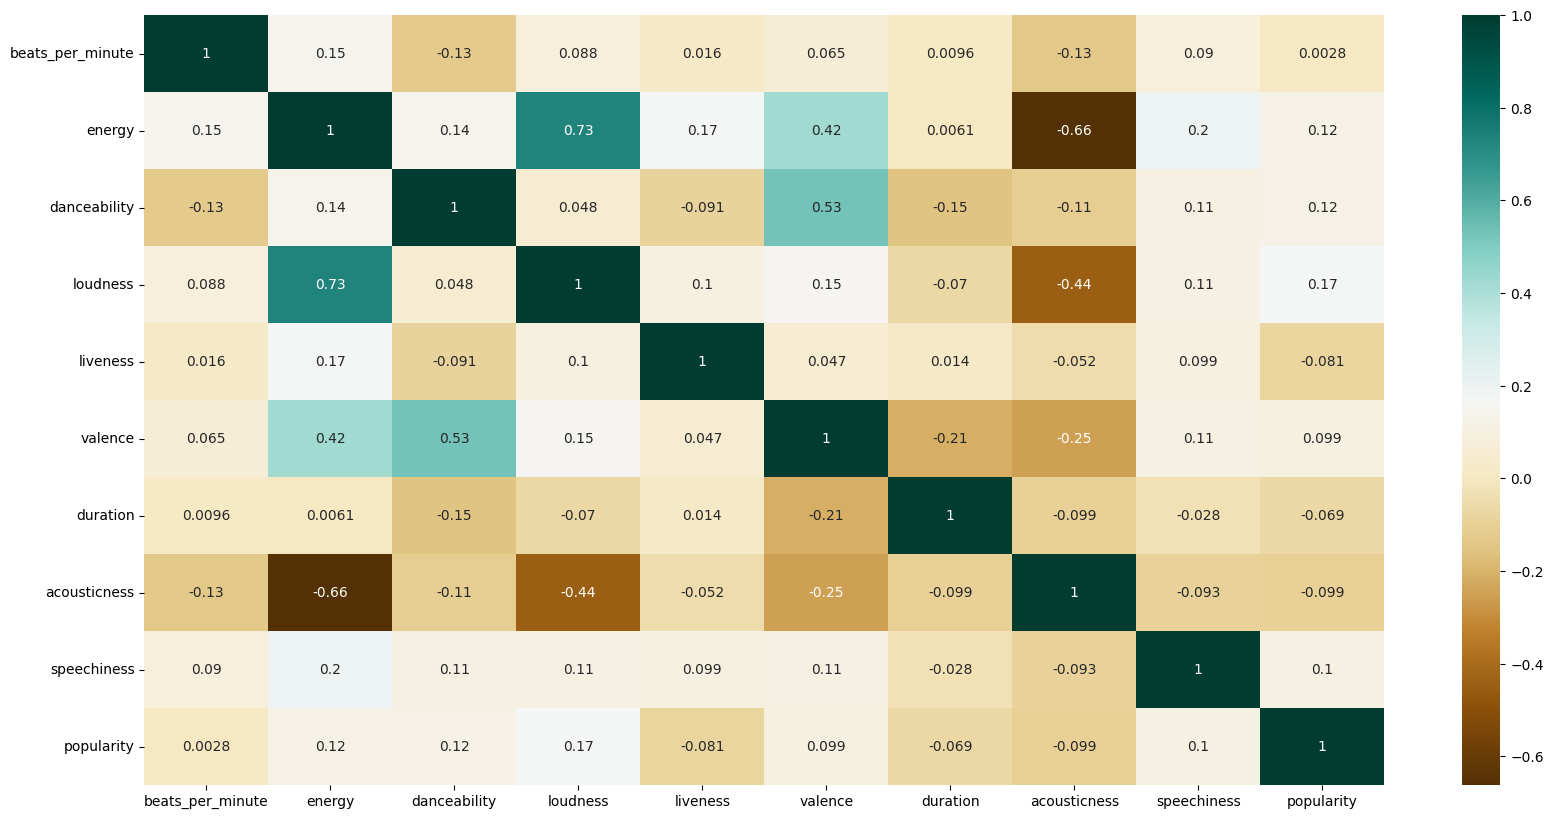

In [1083]:
# Select only numeric columns for correlation matrix
numeric_df = spotify_df.select_dtypes(include=[np.number])

# Plot the heatmap for the correlation matrix of numeric columns
plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='BrBG')
plt.show()

### 3.3 Conclusion:

#### Target Feature: 'Popularity'
From the above heat map, though not very strong, we can see that the strongest features that correlate with Popularity is:
- loudness (17%)
- energy & danceability (13%)
- speechiness (10%)

#### Variable relationships: 
We can see the strongest relationship between the variables excl. paopularity are:
- loudness & energy (73%)
- valence & danceability (53%)
- valence & energy (42%)

# 4 MODELLING DATA

## Model (Popularity Classification)

**Popularity predictor Model:** Will look to classify a songs level of popularity based off of given feature metrics as mention above.

**Steps:**
1. We need to one hot-encode (get dummy variables) for the genre, artist & popularity feature for higher accuracy.
2. Split & Scale Data
3. Modele & Train Data

### Step 1: One hot-encode Genre & Artist Features:

#### - Create dummy variables for the genre column.

In [1084]:
# Function for creating dummy variables

def dummies(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

spotify_df = dummies(spotify_df, 'genre', 'genre')
spotify_df = dummies(spotify_df, 'artist', 'artist')
spotify_df.head()

,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity,...,artist_Wolfmother,artist_Xavier Rudd,artist_Yann Tiersen,artist_Yes,artist_Youp van 't Hek,artist_Youssou N'Dour,artist_ZZ Top,artist_Zucchero,artist_a-ha,artist_blink-182
0,157,30,53,-14,11,68,201,94,3,71,...,False,False,False,False,False,False,False,False,False,False
1,135,79,50,-11,17,81,207,17,7,39,...,False,False,False,False,False,False,False,False,False,False
2,168,69,66,-9,7,52,341,2,17,69,...,False,False,False,False,False,False,False,False,False,False
3,173,96,43,-4,3,37,269,0,4,76,...,False,False,False,False,False,False,False,False,False,False
4,106,82,58,-5,10,87,256,1,3,59,...,False,False,False,False,False,False,False,False,False,False


#### - Classify target feature: 'popularity' into 2x bins, to help better classify our data for our predictive modeling.

- 1 = 'most popular' 
- 0 = 'least popular'  

In [1085]:
spotify_df['popularity'] = pd.qcut(spotify_df['popularity'], q=2, labels=[0, 1]) 
spotify_df[['popularity']].head()

,popularity
0,1
1,0
2,1
3,1
4,0


In [1086]:
target_v = spotify_df['popularity'].value_counts(normalize=True).round(3)
target_v

popularity
0    0.519
1    0.481
Name: proportion, dtype: float64

<Axes: xlabel='popularity', ylabel='proportion'>

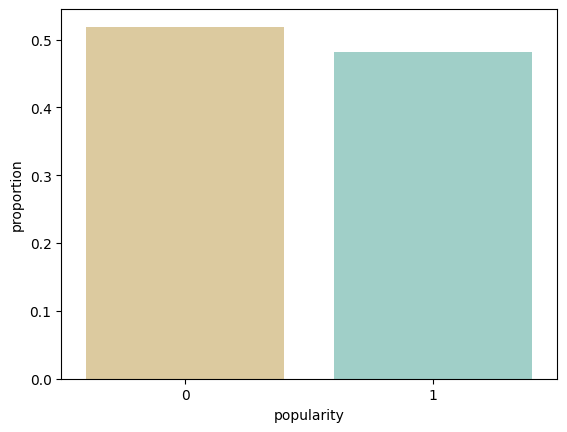

In [1087]:
sns.barplot(x=target_v.index, y=target_v, palette="BrBG", hue=target_v.index, legend=False)

### Analysis

- As we see above, we have a very good split for our target variable. This will greatly minimise class imbalance and will allow our model to be more accurate.

### Step 2: Splitting & Scaling Data

In [1088]:
# Chosing independant and dependant variables:

X = spotify_df[['loudness', 'danceability', 'energy', 'valence']] # independant / features
y = spotify_df['popularity'] # dependant / target

# Split data into training and test sets: 80% training, 20% test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [1089]:
print('Shape of Data:')
print('-')
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape,'y_test:', y_test.shape)

Shape of Data:
-
X_train: (1380, 4) y_train: (1380,)
X_test: (345, 4) y_test: (345,)


In [1090]:
# Scale the independant variable for relatively normal distribution of the data while retaining feature names.
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(
    X_test), columns=X.columns, index=X_test.index)

## Modeling & Training

Due to the nature of the dataset, we will be implementing classification type machine learning with the following:
- Logistic Regression
- Decision Tree Classifier
- Naive Bayes 

## Training Model Accuracy Outputs:

In [1091]:
# Creating Models

logr_model = linear_model.LogisticRegression(solver='liblinear')
dtree_model = tree.DecisionTreeClassifier()
nb_model = GaussianNB()

# Training the models

logr_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Accuracy of trained models with training data:

logr_train_acc = logr_model.score(X_train, y_train)
dtree_train_acc = dtree_model.score(X_train, y_train)
nb_train_acc = nb_model.score(X_train, y_train)

print('Training Model Accuracy Outputs:')
print('-')
print(f"Logistic Regression: {round(logr_train_acc*100,2)} %")
print(f"Decision Tree: {round(dtree_train_acc*100,2)} %")
print(f"Naive Bayes: {round(nb_train_acc*100,2)} %")

Training Model Accuracy Outputs:
-
Logistic Regression: 57.46 %
Decision Tree: 99.93 %
Naive Bayes: 55.87 %


In [1092]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[logr_train_acc, dtree_train_acc, nb_train_acc], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Accuracy of trained models with training data')
fig.show()

### Analysis:
- As seen above it appears that the Decision Tree Model has a really high accuracy rate against the training data. But this seems a bit too high and I suspect over fitting. I will validate this through k-fold cross validation.

## Validating models with k-fold cross validation:

In [1093]:
# Validating models with k-fold cross validation method

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=24)

accuracy_logr = cross_val_score(logr_model, X_train, y_train, scoring="accuracy", cv=kf)
accuracy_dtree = cross_val_score(dtree_model, X_train, y_train, scoring="accuracy", cv=kf)
accuracy_nb = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=kf)

accuracy_logr = accuracy_logr.mean()
accuracy_dtree = accuracy_dtree.mean()
accuracy_nb = accuracy_nb.mean()

print('k-fold Cross Validation Accuracy Outputs:')
print('-')
print(f"Logistic Regression: {round(accuracy_logr*100,2)} %")
print(f"Decision Tree: {round(accuracy_dtree*100,2)} %")
print(f"Naive Bayes: {round(accuracy_nb*100,2)} %")

k-fold Cross Validation Accuracy Outputs:
-
Logistic Regression: 56.81 %
Decision Tree: 54.71 %
Naive Bayes: 55.65 %


In [1094]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[accuracy_logr, accuracy_dtree, accuracy_nb], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Validating models with k-fold cross validation')
fig.show()

### Analysis:
- As seen above this seems a little more accurate with the best accuracy being the Logistic Regression Model. It would appear that with a larger dataset the Decision Tree performs well but when there is minimal data, not so much. 

## Test Data Output from trained models:

In [1095]:
# using the test data for our trained models:

print('Test data - Model Accuracy Outputs:')
print('-')
print(f"Logistic Regression: {round(logr_model.score(X_test, y_test)*100,2)} %")
print(f"Decision Tree: {round(dtree_model.score(X_test, y_test)*100,2)} %")
print(f"Naive Bayes: {round(nb_model.score(X_test, y_test)*100,2)} %")

Test data - Model Accuracy Outputs:
-
Logistic Regression: 58.84 %
Decision Tree: 50.72 %
Naive Bayes: 57.1 %


### Analysis and Next Steps:
- With the test data, we have an identical match with Logistic Regression and Decision Tree.
- Accuracy ratings are very low.
- I will look to now include all variables as to help improve the accuracy of the models.

# Model (Popularity Classification) Pt.2 

- Using all independant variables to try and achieve a greater accuracy

### Splitting & Scaling Data.2

In [1096]:
# Chosing independant and dependant variables:

X_1 = spotify_df.drop(columns='popularity')  # independant/features
y_1 = spotify_df['popularity'] # dependant/target 

# Split data into training and test sets: 80% training, 20% test split.

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=20)

In [1097]:
print('Shape of Data.2:')
print('-')
print('X_train_1:', X_train_1.shape, 'y_train_1:', y_train_1.shape)
print('X_test_1:',X_test_1.shape,'y_test_1:', y_test_1.shape)

Shape of Data.2:
-
X_train_1: (1380, 604) y_train_1: (1380,)
X_test_1: (345, 604) y_test_1: (345,)


In [1098]:
# Scale the independant variable for relatively normal distribution of the data while retaining feature names for X_1.

scaler_1 = StandardScaler()

X_train_1 = pd.DataFrame(scaler_1.fit_transform(
    X_train_1), columns=X_1.columns, index=X_train_1.index)
X_test_1 = pd.DataFrame(scaler_1.transform(X_test_1),
                        columns=X_1.columns, index=X_test_1.index)

## Modeling & Training.2

- Same a previosuly done with the 3x classification models.

#### Training Model Accuracy Outputs.2

In [1099]:
# Creating Models

logr_model_1 = linear_model.LogisticRegression(solver='liblinear')
dtree_model_1 = tree.DecisionTreeClassifier()
nb_model_1 = GaussianNB()

# Training the models

logr_model_1.fit(X_train_1, y_train_1)
dtree_model_1.fit(X_train_1, y_train_1)
nb_model_1.fit(X_train_1, y_train_1)

# Accuracy of trained models with training data:

logr_train_acc_1 = logr_model_1.score(X_train_1, y_train_1)
dtree_train_acc_1 = dtree_model_1.score(X_train_1, y_train_1)
nb_train_acc_1 = nb_model_1.score(X_train_1, y_train_1)

print('Training Model Accuracy Outputs.2:')
print('-')
print('Logistic Regression:', round(logr_train_acc_1*100,2),'%')
print('Decision Tree:', round(dtree_train_acc_1*100,2),'%')
print('Naive Bayes:', round(nb_train_acc_1*100,2),'%')

Training Model Accuracy Outputs.2:
-
Logistic Regression: 85.07 %
Decision Tree: 100.0 %
Naive Bayes: 75.65 %


In [1100]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[logr_train_acc_1, dtree_train_acc_1, nb_train_acc_1], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Accuracy of trained models with tusing all independant variables on training data')
fig.show()

### Analysis:
- As seen above it appears that the accuracy has increased quite a bit for all models, again, Decision Tree Model has a really high accuracy rate against the training data. So will validate this through k-fold cross validation.

#### Validating models with k-fold cross validation.2

In [1101]:
# Validating new models with k-fold cross validation method

accuracy_logr_1 = cross_val_score(logr_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)
accuracy_dtree_1 = cross_val_score(dtree_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)
accuracy_nb_1 = cross_val_score(nb_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)

accuracy_logr_1 = accuracy_logr_1.mean()
accuracy_dtree_1 = accuracy_dtree_1.mean()
accuracy_nb_1 = accuracy_nb_1.mean()

print('k-fold Cross Validation Accuracy Outputs.2:')
print('-')
print("Logistic Regression:", round(accuracy_logr_1*100,2),"%")
print("Decision Tree:", round(accuracy_dtree_1*100,2),"%")
print("Naive Bayes:", round(accuracy_nb_1*100,2),"%")

k-fold Cross Validation Accuracy Outputs.2:
-
Logistic Regression: 69.49 %
Decision Tree: 58.48 %
Naive Bayes: 61.3 %


In [1102]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[accuracy_logr_1, accuracy_dtree_1, accuracy_nb_1], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Validating new models with k-fold cross validation')
fig.show()

### Analysis:
- With the increase in data for the feature variables, we have increased validation of the models, with logistic regression coming out on top and decision trees coming in as least favourable.

#### Test Data Output from trained models.2

In [1103]:
# using the test data for our trained models:

print('Test data - Model Accuracy Outputs.2:')
print('-')
print('Logistic Regression:', round(logr_model_1.score(X_test_1, y_test_1)*100,2))
print('Decision Tree:', round(dtree_model_1.score(X_test_1, y_test_1)*100,2))
print('Naive Bayes:', round(nb_model_1.score(X_test_1, y_test_1)*100,2))

Test data - Model Accuracy Outputs.2:
-
Logistic Regression: 73.62
Decision Tree: 63.48
Naive Bayes: 67.54


## Summary of Model Accuracy:

#### Model (Popularity Classification) 
- With 'loudness', 'danceability', 'energy', 'valence' as independant variables due to highest correlation.

Trained Model:
- LR Accuracy: 57%
- DT Accuracy: 99%
- NB Accuracy: 56%

K-fold Cross Val:
- LR Accuracy: 57%
- DT Accuracy: 56%
- NB Accuracy: 56%

Test Data Result:
- LR Accuracy: 55%
- DT Accuracy: 49%
- NB Accuracy: 51%


#### Model (Popularity Classification) pt.2
- With all independant data variables included.

Trained Model.2:
- LR Accuracy: 85%
- DT Accuracy: 100%
- NB Accuracy: 76%

K-fold Cross Val.2:
- LR Accuracy: 69%
- DT Accuracy: 57%
- NB Accuracy: 61%

Test Data Result.2:
- LR Accuracy: 54%
- DT Accuracy: 47%
- NB Accuracy: 62%

# 5 FINAL CONCLUSIONS

1. Model Performance and Variability
Model accuracies varied significantly across datasets and features, with no model consistently performing well. Using only highly correlated variables (loudness, danceability, energy, valence) resulted in poor test performance (e.g., Logistic Regression: 55%, Decision Tree: 49%). Including all features improved training accuracy (e.g., Logistic Regression: 85%, Decision Tree: 100%) but did not translate to better test performance, indicating overfitting.

2. Challenges in Predicting Popularity
Weak correlations between features and popularity, combined with evolving music trends over decades, likely impacted model performance. These factors highlight the difficulty of capturing the nuances of song popularity with the current dataset.

3. Recommendations in retrospect

- Splitting the dataset into time periods (e.g., decades) could improve accuracy by isolating trends specific to each era.
- For larger, diverse datasets, Linear Regression shows promise but requires more robust feature engineering.
- For smaller datasets, Naive Bayes performed relatively better on test data (62% accuracy) with all features included.

4. Conclusion
The models demonstrate potential but lack generalizability due to dataset limitations. Future improvements should focus on expanding the dataset and refining feature selection based on temporal and contextual trends.